DSC-630-T302
Chitramoy Mukherjee
Date : 05/10/2024
Week9 - DSC-630 Project Milestone-4

Data Preparation :

Data preparation is the first and most important step of model building. By following these data preparation steps, we can ensure that the dataset is clean, relevant, and properly formatted for training a Hotel Booking Cancellation Prediction Model. This will ultimately lead to better model performance and more accurate predictions.Dataset Basic Information is already provided in the earlier milestone where we have provided total Number of Entries, Columns, Data Types and Missing values. Justa as a recap, A majority of the columns, 16 to be precise, are of the object data type and 16 columns are of the int64 data type, representing integer values and 4 columns are of the float64 data type, which typically denotes decimal values.


To prepare the data for a Hotel Booking Cancellation Prediction Model, we would typically perform the following steps:

Data Cleaning:
1.  Check for missing values in each column and handle them appropriately (e.g., imputation, deletion).
2.  Identify and handle any outliers or anomalies in the data.
3.  Remove irrelevant columns that do not contribute to the prediction task.

Feature Selection/Engineering:
1. Select relevant features that are likely to influence hotel booking cancellations (e.g., lead_time, arrival_date, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, market_segment, deposit_type, etc.).
2. Create new features if necessary (e.g., total_stays = stays_in_weekend_nights + stays_in_week_nights).

Handling Categorical Variables:
1. Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.
2. Handle categorical variables with many unique categories by grouping or binning them.

Data Splitting:
1. Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
2. Optionally, perform stratified sampling to ensure that the distribution of target labels (canceled/not canceled) is similar in both the training and testing sets.

Data Transformation :
1. Apply transformations such as log transformations or Box-Cox transformations to handle skewed distributions in numerical features.

Data Validation:
1. Check the consistency and integrity of the data after preprocessing to ensure that it is suitable for model training.

During the model building step, I will be builiding Logistic regression, KNN, Decision Tree Classifier, Random Forest Classifier and XgBoost Classifier and will perform a comparison of the model based on F1-score for class '1' (canceled) and will find the best prediction model.


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier


import folium
from folium.plugins import HeatMap
import plotly.express as px
import sort_dataframeby_monthorweek as sd

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [3]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

In [4]:
# reading data
df = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-9\\hotel_bookings.csv')
df.head()

# Data Types:
# A majority of the columns, 16 to be precise, are of the object data type (often representing strings or categorical data).
# 16 columns are of the int64 data type, representing integer values.
# 4 columns are of the float64 data type, which typically denotes decimal values.
# Missing Values:
# The column children has 4 missing values.
# The column country has 488 missing values.
# The column agent has 16,340 missing values.
# The column company has a significant number of missing values, totaling 112,593

# Based on the data types and the feature explanations provided earlier, we identified that 20 columns (hotel, is_canceled, arrival_date_year, arrival_date_month,
# meal, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, agent, company, customer_type, 
# reservation_status, name, email, phone-number and credit_card) are categorical in terms of their semantics. These features must have string (object) 
# data type to ensure proper analysis and interpretation in subsequent steps.


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [6]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
# Dataset Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# checking for null values in the dataset
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

In [9]:
# filling null values with zero
df.fillna(0, inplace = True)

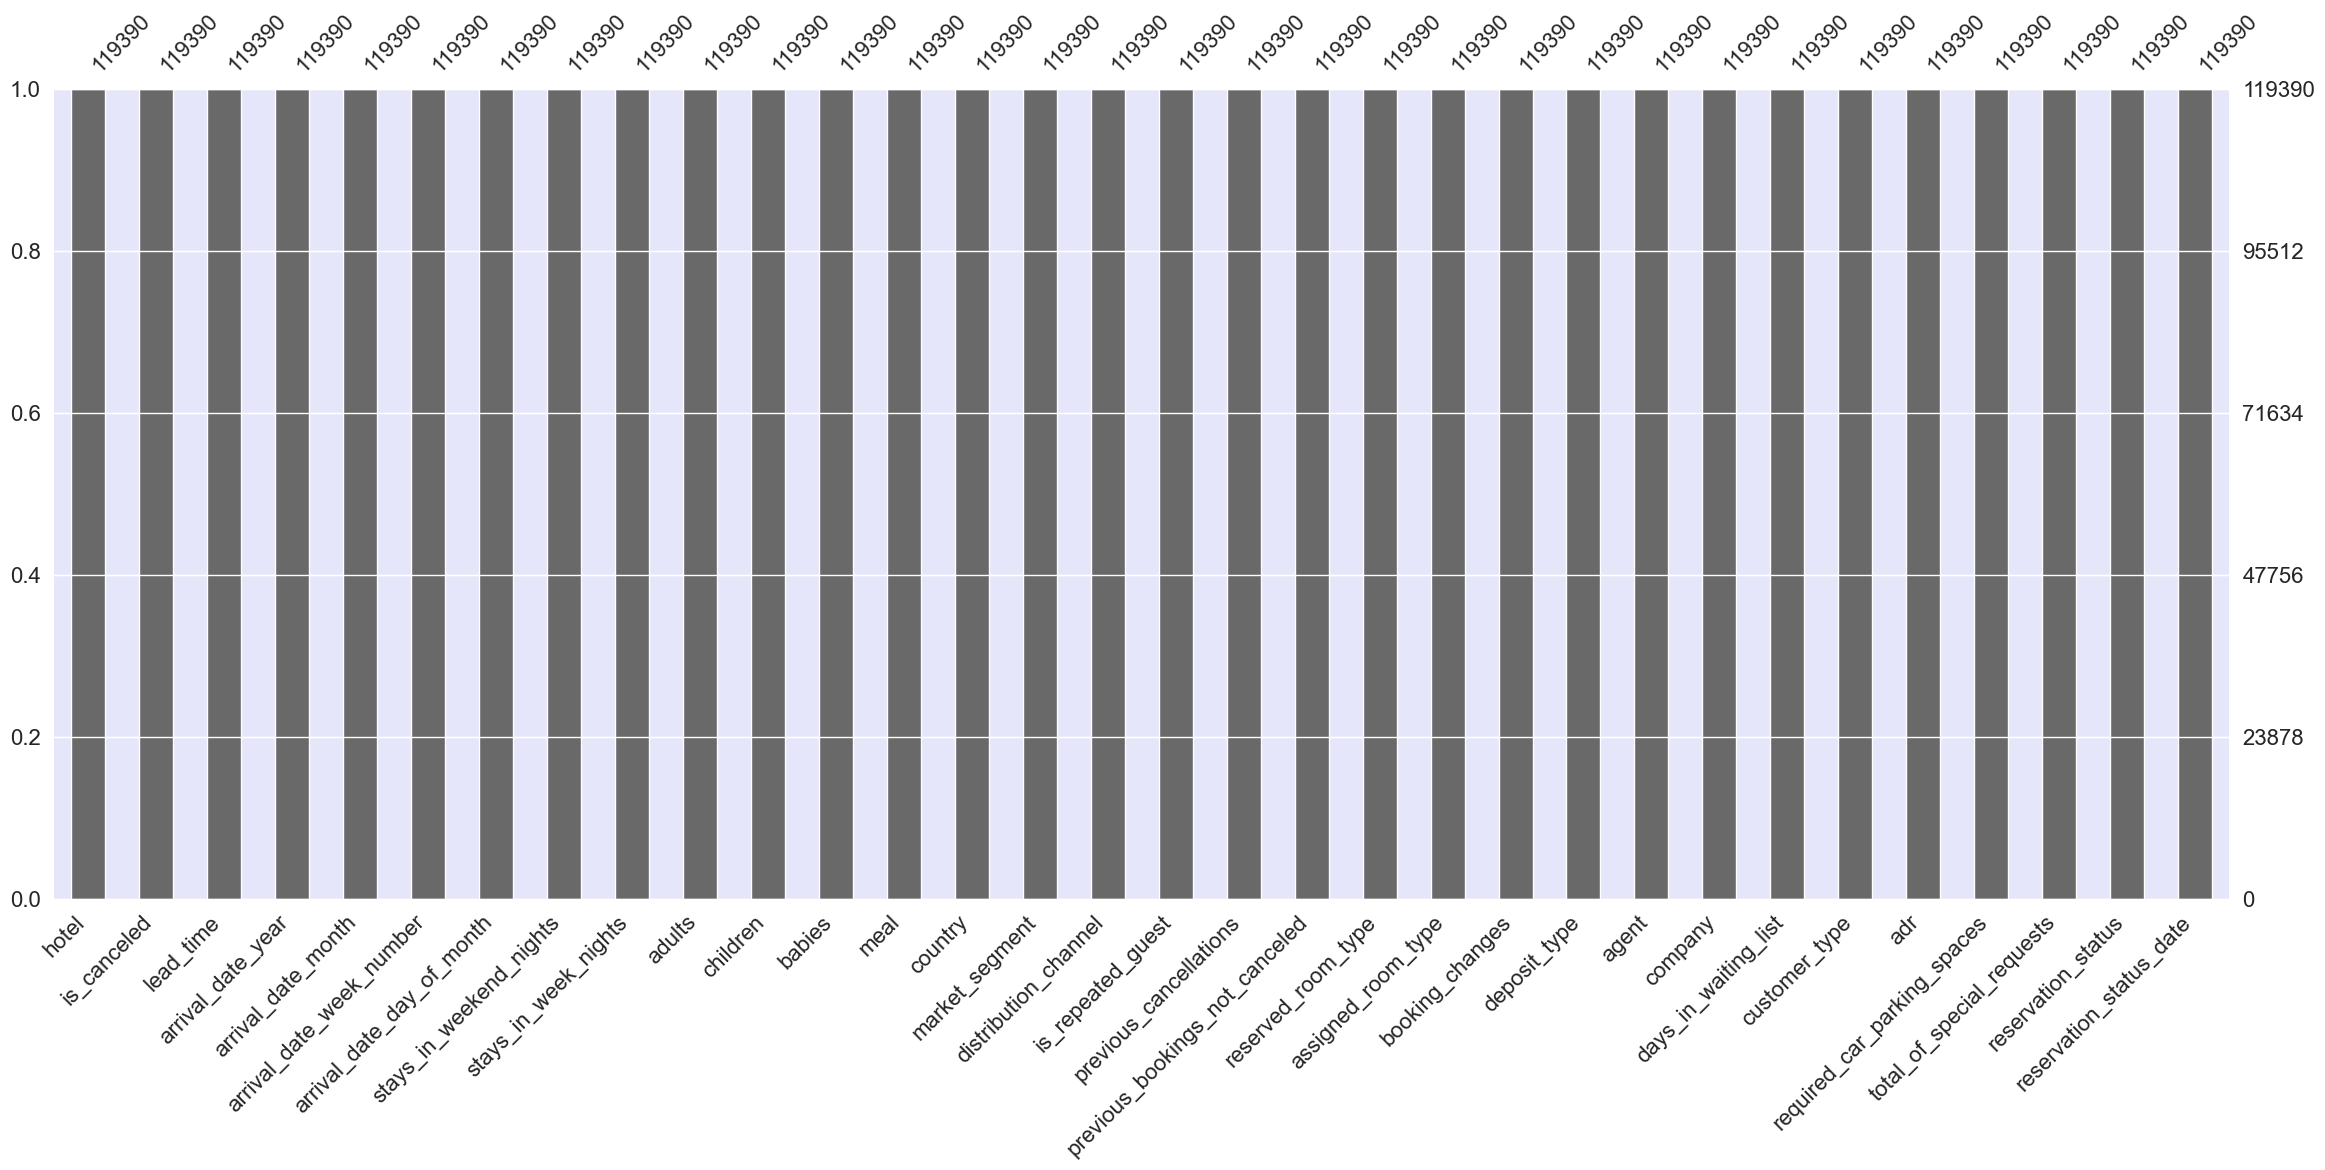

In [10]:
# visualizing null values
msno.bar(df)
plt.show()

In [11]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [12]:
# filter out the rows identified having children, babies and adults as '0'
df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [15]:
# Identify the country wise guests
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]

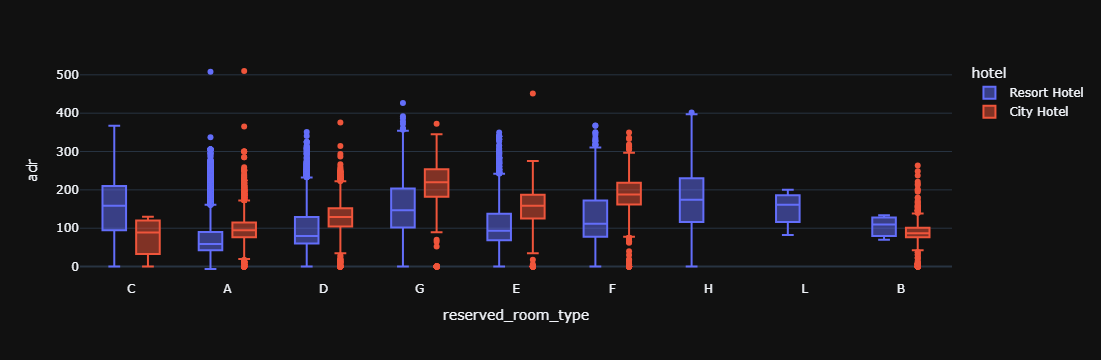

In [18]:
# Seasonal factors are also important, So the prices varies a lot based on that.
data = df[df['is_canceled'] == 0]
px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')
# The figure shows that the average price per room depends on its type and the standard deviation.

In [25]:
# we observe here that month column is not in order, and if we visualize we will get improper conclusions.
# So, first we have to provide right hierarchy to month column
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [26]:
final_prices = sort_month(final_hotel, 'month')
final_prices

month  price_for_resort  price_for_city_hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

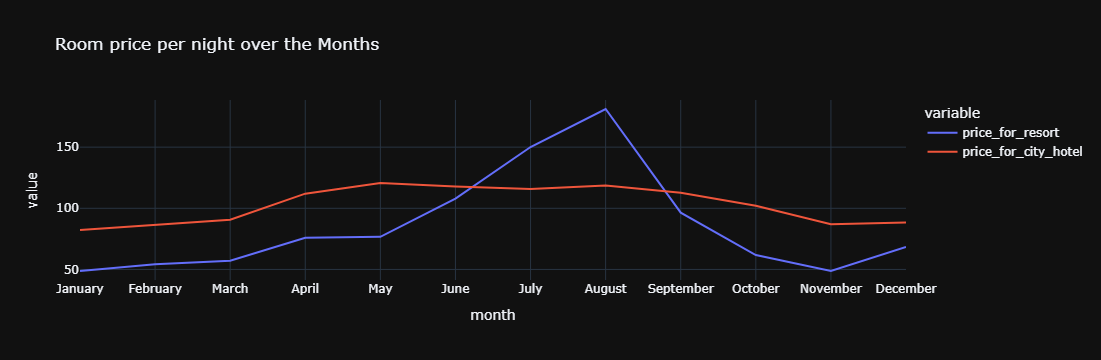

<Figure size 1700x800 with 0 Axes>

In [27]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

# This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn 

In [40]:
# Duration of stay in the hotel.
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [41]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  ...  \
0   BB     PRT         Direct               Direct  ...   
1   BB     PRT         Direct               Direct  ...   
2   BB     GBR         Direct               Direct  ...   
3   BB     GBR      Corporate            Corporate  ...   
4   BB     GBR      Online TA                TA/TO  ...   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   C   
1                       0                               0                   C   
2                       0                               0                   A   
3                       0                               0                   A   
4                       0                               0                   A   

  assigned_room_type booking_changes  deposit_type  agent  company  \
0                  C               3    No Deposit    0.0      0.0   
1                  C               4    No Deposit    0.0      0.0   
2                  C               0    No Deposit    0.0      0.0   
3                  A               0    No Deposit  304.0      0.0   
4                  A               0    No Deposit  240.0      0.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0      Transient   0.0                            0   
1                     0      Transient   0.0                            0   
2                     0      Transient  75.0                            0   
3                     0      Transient  75.0                            0   
4                     0      Transient  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0           Check-Out              2015-07-01   
1                          0           Check-Out              2015-07-01   
2                          0           Check-Out              2015-07-02   
3                          0           Check-Out              2015-07-02   
4                          1           Check-Out              2015-07-03   

  total_nights  
0            0  
1            0  
2            1  
3            1  
4            2  

[5 rows x 33 columns]

In [42]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

In [43]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

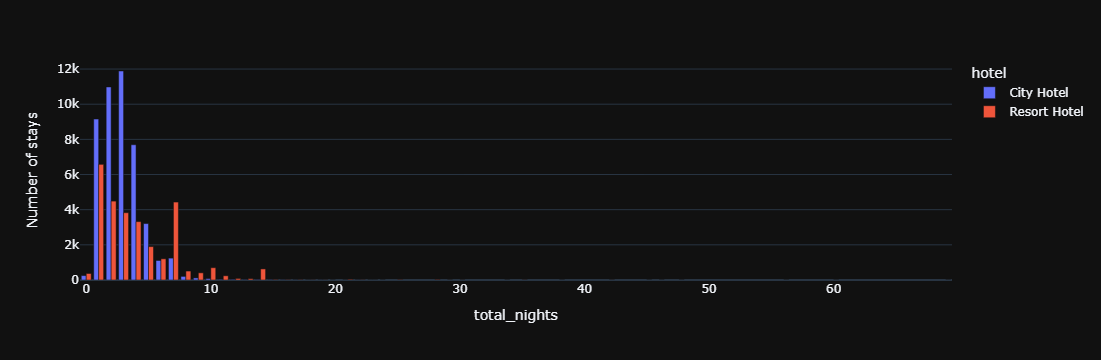

In [44]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

Above ploting shows that for City hotle most of the duration stay is 4 days whereas for Resort Hotel it's 2 days but for Resort hotel 8 days stay is also have significant no. of bookings.

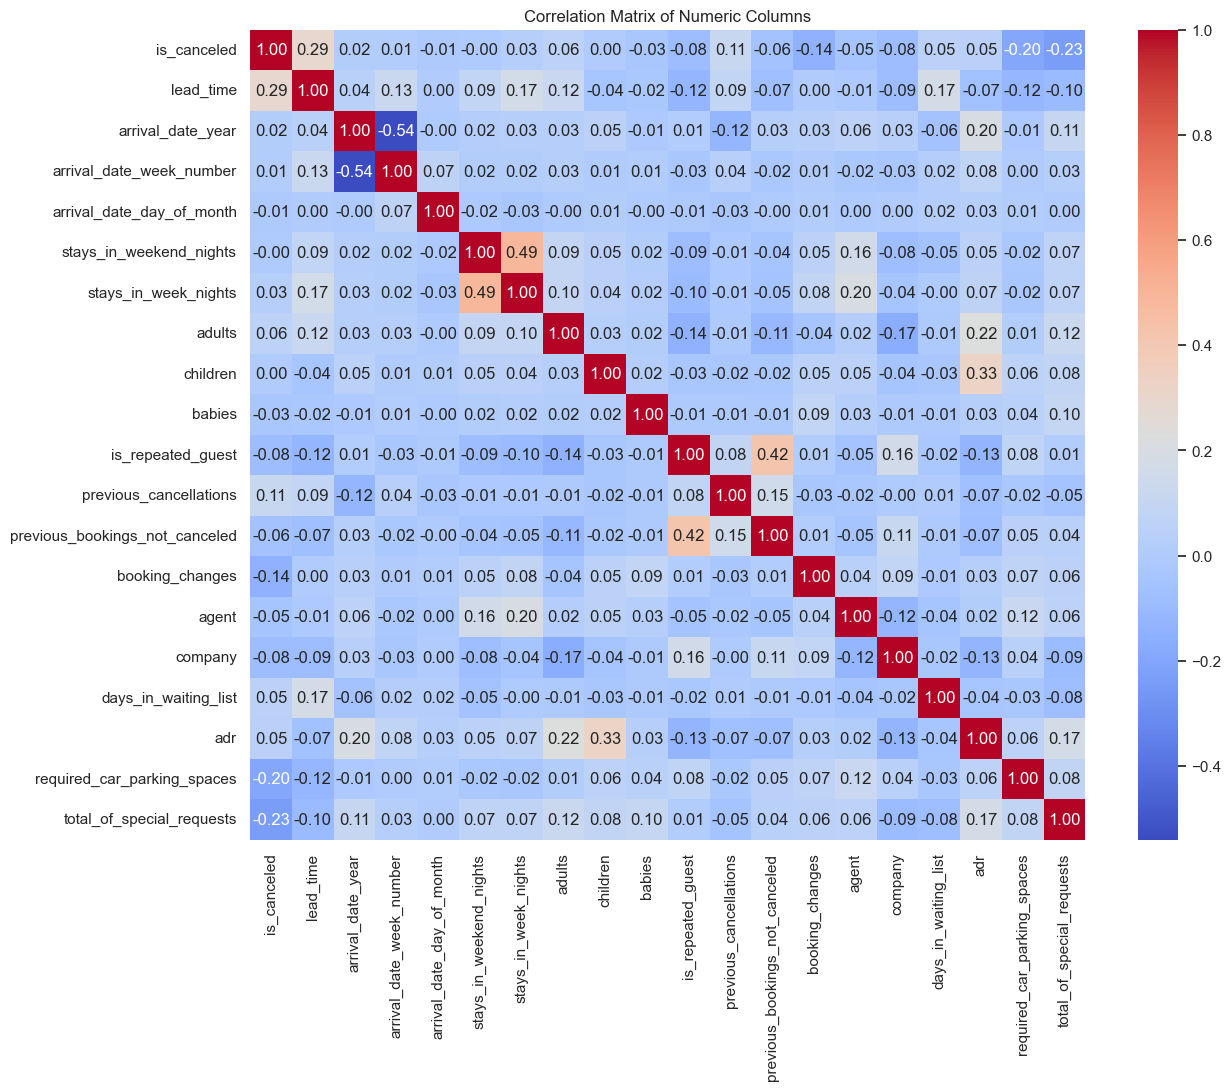

In [50]:
# Identify categorical and numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [53]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [54]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [55]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              2015-07-01  
1                  C   No Deposit     Transient              2015-07-01  
2                  A   No Deposit     Transient              2015-07-02  
3                  A   No Deposit     Transient              2015-07-02  
4                  A   No Deposit     Transient              2015-07-03

In [56]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [57]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [58]:
cat_df.head()

hotel meal market_segment distribution_channel reserved_room_type  \
0  Resort Hotel   BB         Direct               Direct                  C   
1  Resort Hotel   BB         Direct               Direct                  C   
2  Resort Hotel   BB         Direct               Direct                  A   
3  Resort Hotel   BB      Corporate            Corporate                  A   
4  Resort Hotel   BB      Online TA                TA/TO                  A   

  deposit_type customer_type  year  month  day  
0   No Deposit     Transient  2015      7    1  
1   No Deposit     Transient  2015      7    1  
2   No Deposit     Transient  2015      7    2  
3   No Deposit     Transient  2015      7    2  
4   No Deposit     Transient  2015      7    3

In [59]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [60]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [61]:
# Display the categorical variables output
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      0     0               0                     0                   0   
1      0     0               0                     0                   0   
2      0     0               0                     0                   1   
3      0     0               1                     1                   1   
4      0     0               2                     2                   1   

   deposit_type  customer_type  year  month  day  
0             0              0     0      7    1  
1             0              0     0      7    1  
2             0              0     0      7    2  
3             0              0     0      7    2  
4             0              0     0      7    3

In [62]:
# drop the categorical columns and slect and view numercal columns
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0    0.0      0.0    0.00   
1                                    0    0.0      0.0    0.00   
2                                    0    0.0      0.0   75.00   
3                                    0  304.0      0.0   75.00   
4                                    0  240.0      0.0   98.00   
...                                ...    ...      ...     ...   
119385                               0  394.0      0.0   96.14   
119386                               0    9.0      0.0  225.43   
119387                               0    9.0      0.0  157.71   
119388                               0   89.0      0.0  104.40   
119389                               0    9.0      0.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [63]:
# Display the numerical variables output
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [64]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [65]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [66]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [67]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [68]:
X.shape, y.shape

((119210, 26), (119210,))

In [69]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [70]:
X_train.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
30408       0     0               5                     0                   1   
84226       1     3               2                     2                   1   
115183      1     0               2                     2                   1   
62917       1     0               5                     2                   1   
54644       1     0               0                     0                   5   

        deposit_type  customer_type  year  month  day  lead_time  \
30408              0              2     2     11   21   4.753590   
84226              0              2     2      2   21   1.945910   
115183             0              0     3      7    3   5.135798   
62917              3              0     2     11   25   4.127134   
54644              0              0     2      1   18   5.267858   

        arrival_date_week_number  arrival_date_day_of_month  \
30408                   3.871201                   2.890372   
84226                   2.197225                   3.044522   
115183                  3.332205                   1.098612   
62917                   1.609438                   3.258097   
54644                   3.433987                   3.135494   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
30408                         1                     3       2       0.0   
84226                         0                     1       2       0.0   
115183                        1                     0       1       0.0   
62917                         0                     2       2       0.0   
54644                         0                     1       2       2.0   

        babies  is_repeated_guest  previous_cancellations  \
30408        0                  0                       0   
84226        0                  0                       0   
115183       0                  0                       0   
62917        0                  0                       0   
54644        1                  0                       0   

        previous_bookings_not_canceled     agent  company       adr  \
30408                                0  0.000000      0.0  3.555348   
84226                                0  2.302585      0.0  4.394449   
115183                               0  2.302585      0.0  4.596129   
62917                                0  5.789960      0.0  4.394449   
54644                                0  2.708050      0.0  5.152713   

        required_car_parking_spaces  total_of_special_requests  
30408                             0                          0  
84226                             0                          1  
115183                            0                          0  
62917                             0                          0  
54644                             0                          1

In [71]:
X_test.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
41128       1     0               3                     2                   1   
112779      1     0               2                     2                   1   
27244       0     0               1                     1                   1   
98610       1     0               2                     2                   2   
78196       1     0               0                     0                   1   

        deposit_type  customer_type  year  month  day  lead_time  \
41128              0              0     0      8   11   0.693147   
112779             0              2     3      5   28   4.859812   
27244              0              0     2      8   24   1.609438   
98610              0              0     2     10    2   4.875197   
78196              0              0     0     10    6   2.564949   

        arrival_date_week_number  arrival_date_day_of_month  \
41128                   3.526361                   2.564949   
112779                  3.091042                   3.295837   
27244                   3.583519                   3.178054   
98610                   3.713572                   3.401197   
78196                   3.713572                   1.386294   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
41128                         0                     4       2       0.0   
112779                        0                     2       2       0.0   
27244                         0                     1       1       0.0   
98610                         0                     3       2       0.0   
78196                         2                     1       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
41128        0                  0                       0   
112779       0                  0                       0   
27244        0                  0                       0   
98610        0                  0                       0   
78196        0                  0                       0   

        previous_bookings_not_canceled     agent  company       adr  \
41128                                0  3.761200   0.0000  4.709530   
112779                               0  2.302585   0.0000  4.844187   
27244                                0  0.000000   3.7612  4.934474   
98610                                0  2.302585   0.0000  4.945207   
78196                                0  2.708050   0.0000  4.943997   

        required_car_parking_spaces  total_of_special_requests  
41128                             0                          0  
112779                            0                          1  
27244                             1                          0  
98610                             0                          2  
78196                             0                          0

In [72]:
y_train.head(), y_test.head()

(30408     0
 84226     0
 115183    0
 62917     1
 54644     1
 Name: is_canceled, dtype: int64,
 41128     1
 112779    0
 27244     0
 98610     0
 78196     0
 Name: is_canceled, dtype: int64)

In [73]:
# LR model
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8092721527836032
Confusion Matrix : 
[[21263  1170]
 [ 5651  7679]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22433
           1       0.87      0.58      0.69     13330

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



Accuracy Score: 0.8093
Precision for class 0 (not canceled) is 0.79, indicating that 79% of the instances predicted as not canceled were actually not canceled.
Recall for class 0 is 0.95, meaning that 95% of the actual not canceled instances were correctly predicted.
Precision for class 1 (canceled) is 0.87, indicating that 87% of the instances predicted as canceled were actually canceled.
Recall for class 1 is 0.58, meaning that 58% of the actual canceled instances were correctly predicted.

In [79]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8903056231300506
Confusion Matrix : 
[[21660   773]
 [ 3150 10180]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     22433
           1       0.93      0.76      0.84     13330

    accuracy                           0.89     35763
   macro avg       0.90      0.86      0.88     35763
weighted avg       0.89      0.89      0.89     35763



Accuracy Score: 0.8903
Precision for class 0 is 0.87, indicating that 87% of the instances predicted as not canceled were actually not canceled.
Recall for class 0 is 0.97, meaning that 97% of the actual not canceled instances were correctly predicted.
Precision for class 1 is 0.93, indicating that 93% of the instances predicted as canceled were actually canceled.
Recall for class 1 is 0.76, meaning that 76% of the actual canceled instances were correctly predicted.

In [75]:
# DT model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.946676732936275
Confusion Matrix : 
[[21462   971]
 [  936 12394]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22433
           1       0.93      0.93      0.93     13330

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



Accuracy Score: 0.9467
Precision for class 0 is 0.96, indicating that 96% of the instances predicted as not canceled were actually not canceled.
Recall for class 0 is 0.96, meaning that 96% of the actual not canceled instances were correctly predicted.
Precision for class 1 is 0.93, indicating that 93% of the instances predicted as canceled were actually canceled.
Recall for class 1 is 0.93, meaning that 93% of the actual canceled instances were correctly predicted.

Additionally, the model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

In [76]:
# Random Forest model
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9547017867628554
Confusion Matrix : 
[[22270   163]
 [ 1457 11873]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22433
           1       0.99      0.89      0.94     13330

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



Accuracy Score: 0.9547
Precision for class 0 is 0.94, indicating that 94% of the instances predicted as not canceled were actually not canceled.
Recall for class 0 is 0.99, meaning that 99% of the actual not canceled instances were correctly predicted.
Precision for class 1 is 0.99, indicating that 99% of the instances predicted as canceled were actually canceled.
Recall for class 1 is 0.89, meaning that 89% of the actual canceled instances were correctly predicted.

The confusion matrix shows that there are some False Positives and False Negatives, but the model is doing a good job of minimizing them.

Additionally, the model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

In [77]:
# XGBoost Model Building
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9817409054050276
Confusion Matrix : 
[[22419    14]
 [  639 12691]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22433
           1       1.00      0.95      0.97     13330

    accuracy                           0.98     35763
   macro avg       0.99      0.98      0.98     35763
weighted avg       0.98      0.98      0.98     35763



Accuracy Score: 0.9817
Precision for class 0 is 0.97, indicating that 97% of the instances predicted as not canceled were actually not canceled.
Recall for class 0 is 1.00, meaning that 100% of the actual not canceled instances were correctly predicted.
Precision for class 1 is 1.00, indicating that 100% of the instances predicted as canceled were actually canceled.
Recall for class 1 is 0.95, meaning that 95% of the actual canceled instances were correctly predicted.

The model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.
Compared to the Random Forest (RF) model, the XGBoost (XGB) model shows a slight improvement in all the performance metrics. Although the improvement is not significant, it is still better at balancing the trade-off between Precision and Recall, leading to a higher F1-score. This indicates that the XGBoost model is a better model for predicting cancellations.

In [80]:
# Compare the model output score 
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf,  acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
4                   XgBoost  0.981741
3  Random Forest Classifier  0.954702
2  Decision Tree Classifier  0.946677
1                       KNN  0.890306
0       Logistic Regression  0.809272

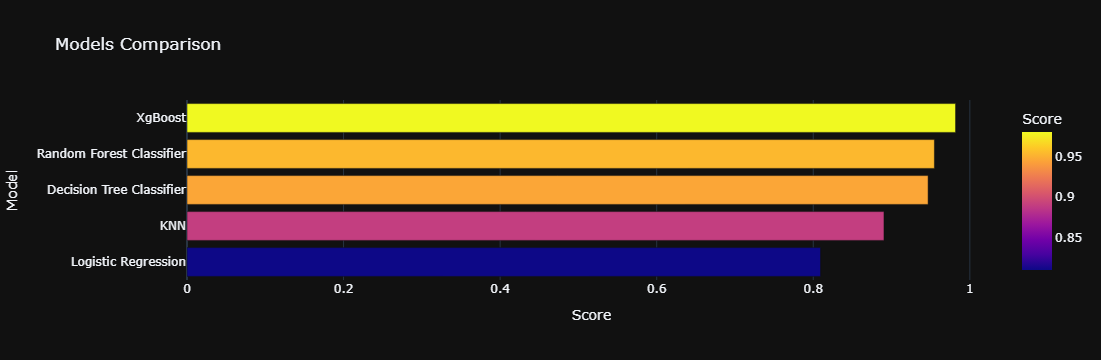

In [81]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

Among all the tested classifiers, XGBoost had the best performance in predicting hotel booking cancellations. Random forst classifier and Decision Tree Classifier also have good score but lesser compare to XGBoost.

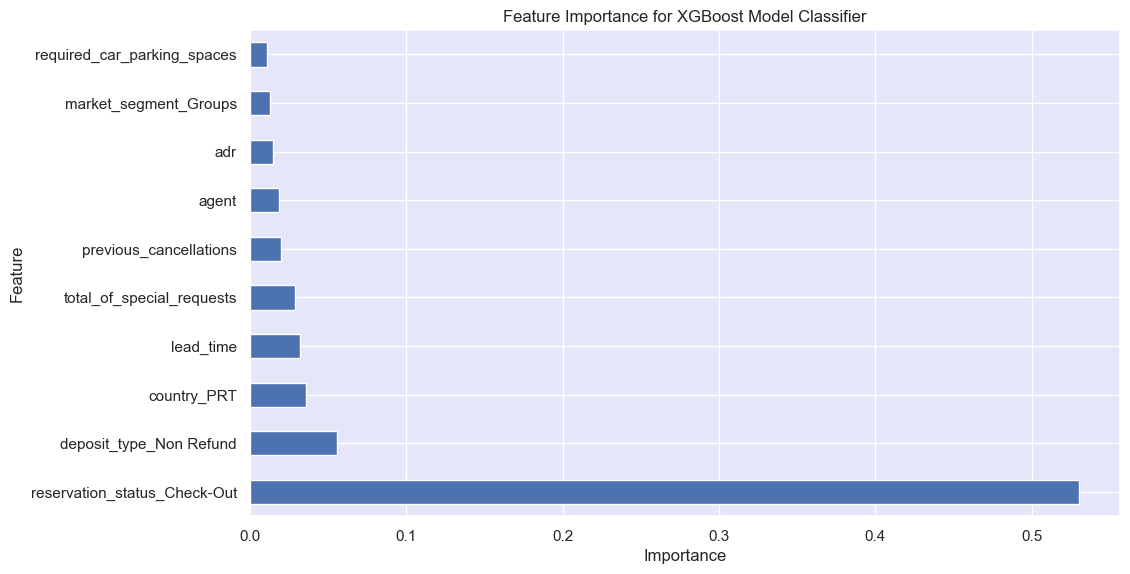

In [86]:
# Feature importance for XGBoost Model classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)  # Selecting top 10 features

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Feature Importance for XGBoost Model Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()